# Reducción de Dimensionalidad y Benchmarking de Modelos (Core)

## Descripción

En este proyecto, aplicarás una combinación de técnicas avanzadas, comenzando por un análisis de reducción de dimensionalidad (como PCA) y luego realizarás un benchmark de diferentes modelos de machine learning para encontrar el que mejor se adecue a los objetivos específicos del dataset que has elegido.

## Objetivo

El objetivo es realizar un análisis exhaustivo que comience con la reducción de dimensionalidad para simplificar el dataset y luego probar varios modelos de machine learning para determinar cuál ofrece el mejor rendimiento en términos de precisión, recall, F1-score u otras métricas relevantes para tu problema.

## Instrucciones

### 1. Selección del dataset
- Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
- Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

### 2. Reducción de dimensionalidad
- Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
- Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
- Utiliza las características reducidas para simplificar el conjunto de datos.

### 3. Benchmarking de modelos
- Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:
  - Regresión logística
  - Árboles de decisión
  - Random Forest
  - Support Vector Machines (SVM)
- Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

### 4. Análisis comparativo de modelos
- Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.
- Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

### 5. Informe final
- Elabora un informe detallado que incluya:
  - El análisis de reducción de dimensionalidad, mostrando cómo PCA (u otra técnica) ayudó a reducir el número de características sin perder información relevante.
  - Un análisis comparativo de los modelos probados, con gráficos que muestren el rendimiento de cada modelo.
  - Conclusiones y recomendaciones sobre cuál modelo utilizarías en un escenario real.


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Carga de datos
dataset_url = r"C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_3_advanced_machine_learning\data\boston_house_price_data.csv"
df = pd.read_csv(dataset_url)

In [3]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


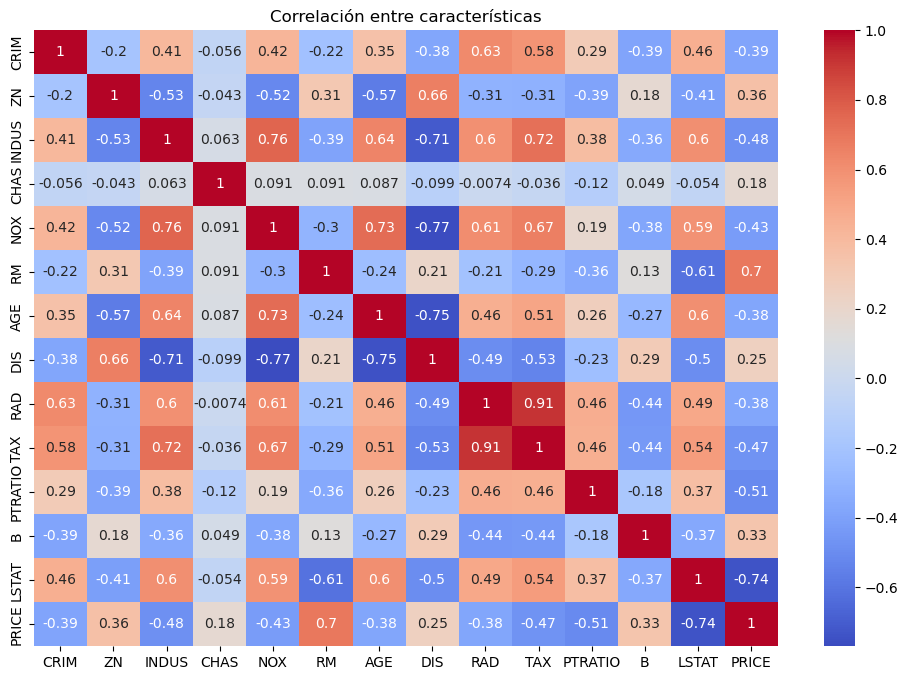

In [5]:
# Heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre características')
plt.show()


# Análisis de la correlación de variables

#### **Correlación Positiva Fuerte:**
- **RM (número de habitaciones):**  
  Existe una fuerte correlación positiva entre el número de habitaciones y el precio. Esto indica que a mayor número de habitaciones, generalmente mayor será el precio de la vivienda.

- **ZN (proporción de zona residencial):**  
  Una correlación positiva moderada sugiere que las zonas residenciales tienden a tener viviendas con precios más altos.

- **DIS (distancia a centros de empleo):**  
  Aunque no tan fuerte como las anteriores, hay una correlación positiva, lo que sugiere que las casas más cercanas a centros de empleo podrían ser más caras.

#### **Correlación Negativa Fuerte:**
- **LSTAT (porcentaje de la población de clase baja):**  
  Existe una fuerte correlación negativa. Esto significa que a medida que aumenta el porcentaje de población de clase baja en una zona, el precio de las viviendas tiende a disminuir.

- **CRIM (tasa de criminalidad):**  
  La correlación negativa indica que las zonas con tasas de criminalidad más altas suelen tener precios de vivienda más bajos.

#### **Otras Correlaciones:**
- **NOX (concentración de óxidos de nitrógeno):**  
  Hay una correlación negativa moderada, lo que sugiere que las zonas con niveles más altos de contaminación tienen precios de vivienda más bajos.

- **INDUS (proporción de zonas industriales):**  
  También existe una correlación negativa, lo que indica que las zonas con mayor actividad industrial suelen tener precios de vivienda más bajos.

#### **Conclusiones para el Modelo de Machine Learning:**
1. **Variables más importantes:**  
   RM (número de habitaciones) y LSTAT (porcentaje de la población de clase baja) parecen ser las variables más influyentes en el precio de las viviendas.

2. **Multicolinealidad:**  
   Observamos que algunas variables están altamente correlacionadas entre sí (por ejemplo, NOX e INDUS). Esto podría generar problemas de multicolinealidad en el modelo. Podría ser necesario realizar una selección de características o utilizar técnicas de regularización para mitigar este efecto.

3. **Transformaciones:**  
   Algunas variables podrían requerir transformaciones (por ejemplo, logaritmo) para mejorar la linealidad de la relación con la variable objetivo y mejorar el rendimiento del modelo.


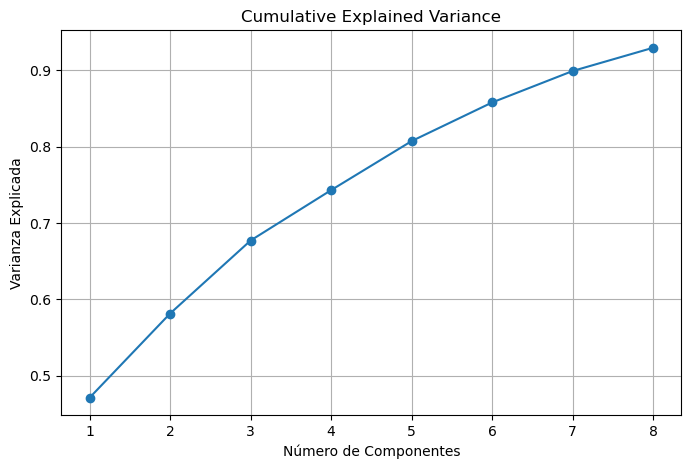

In [6]:
# Escalado de los datos
features = df.drop(columns=['PRICE'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicación de PCA
pca = PCA(n_components=0.9)  # Mantener el 90% de la variabilidad
features_pca = pca.fit_transform(features_scaled)

# Visualizar la variabilidad explicada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.grid()
plt.show()


In [7]:
# Aplicar PCA con el número óptimo de componentes
pca_opt = PCA(n_components=6)  # Cambiar si es necesario
features_pca_opt = pca_opt.fit_transform(features_scaled)

# Verificar la varianza explicada
print(f"Varianza explicada por los {pca_opt.n_components_} componentes seleccionados:")
print(pca_opt.explained_variance_ratio_.cumsum())


Varianza explicada por los 6 componentes seleccionados:
[0.47129606 0.581548   0.67713389 0.74310121 0.80731782 0.8578876 ]


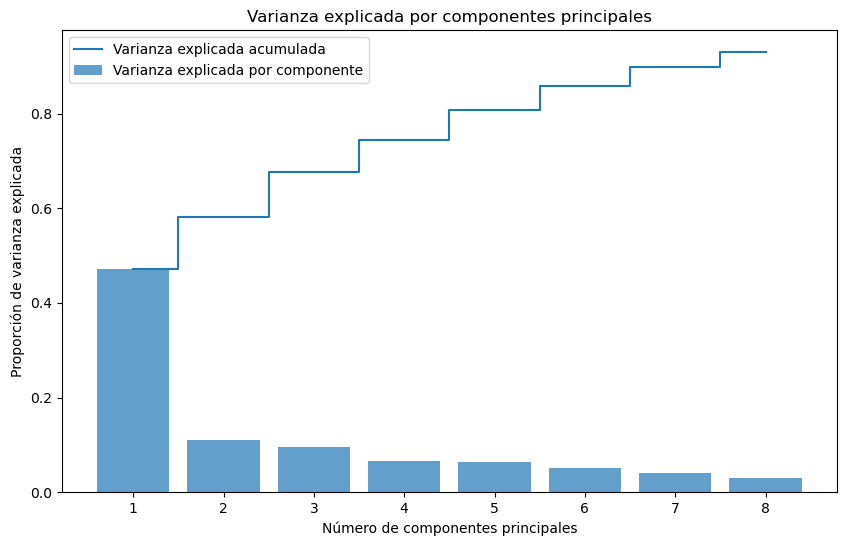

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Visualización de la varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Varianza explicada por componente')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend(loc='best')
plt.show()


In [9]:
# Creación de un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(features_pca_opt, columns=[f'PC{i+1}' for i in range(6)])
df_pca['PRICE'] = df['PRICE']

# Vista previa del dataset reducido
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6  PRICE
0 -2.098297  0.773113  0.342943 -0.891774 -0.423070  0.315338   24.0
1 -1.457252  0.591985 -0.695199 -0.487459  0.195876 -0.264223   21.6
2 -2.074598  0.599639  0.167122 -0.739204  0.934534 -0.448095   34.7
3 -2.611504 -0.006871 -0.100284 -0.343721  1.104956 -0.664649   33.4
4 -2.458185  0.097712 -0.075348 -0.427907  1.065924 -0.617047   36.2


In [10]:
# Dividir en entrenamiento y prueba
X = df_pca.drop(columns='PRICE')
y = df_pca['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression: MSE = 29.68, MAE = 3.30, RMSE = 5.45, R2 = 0.60
Decision Tree: MSE = 27.06, MAE = 3.68, RMSE = 5.20, R2 = 0.63
Random Forest: MSE = 18.41, MAE = 2.71, RMSE = 4.29, R2 = 0.75
SVR: MSE = 27.76, MAE = 2.87, RMSE = 5.27, R2 = 0.62
 
Linear Regression -> R2 promedio (CV): 0.50
Decision Tree -> R2 promedio (CV): -1.94
Random Forest -> R2 promedio (CV): 0.02
SVR -> R2 promedio (CV): 0.26


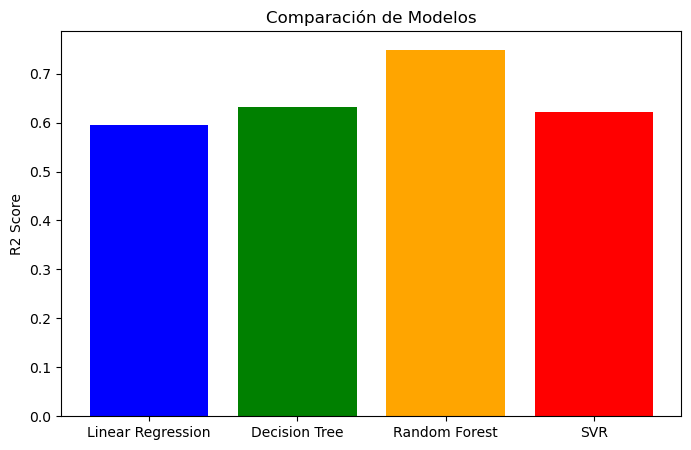

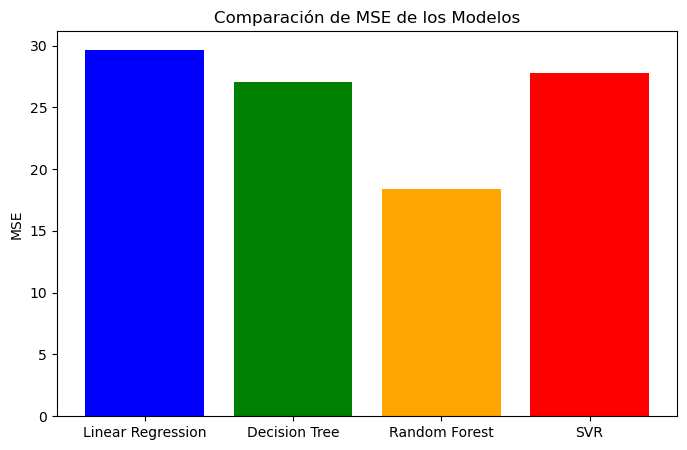

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Inicializar modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()  # Agregamos el modelo SVR
}

results = {}

# Entrenamiento y evaluación
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Cálculo de las métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Mostrar resultados con más métricas
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.2f}, MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.2f}")

print(" ")
# Evaluación utilizando cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} -> R2 promedio (CV): {scores.mean():.2f}")
    
    
# Visualización de los resultados de R2
model_names = list(results.keys())
r2_scores = [metrics['R2'] for metrics in results.values()]

plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red'])  # Añadimos un color más para el SVR
plt.ylabel('R2 Score')
plt.title('Comparación de Modelos')
plt.show()



# Visualización de los resultados de MSE
mse_scores = [metrics['MSE'] for metrics in results.values()]
plt.figure(figsize=(8, 5))
plt.bar(model_names, mse_scores, color=['blue', 'green', 'orange', 'red'])  # Añadimos un color más para el SVR
plt.ylabel('MSE')
plt.title('Comparación de MSE de los Modelos')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Ajustar el modelo con los datos reducidos (df_pca, y)
grid_search.fit(df_pca, y)

# Obtener los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (MSE):", -grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor puntuación (MSE): 5.688842356694493


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el rango de hiperparámetros
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar el RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                                   verbose=2, random_state=42, n_jobs=-1)

# Ajustar el modelo
random_search.fit(df_pca, y)

# Obtener los mejores parámetros
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación (MSE):", -random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'max_depth': 39, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 253}
Mejor puntuación (MSE): 7.837873861430194


In [17]:
print(f"Columnas en X_train: {X_train.columns}")
print(f"Columnas en X_test: {X_test.columns}")


Columnas en X_train: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')
Columnas en X_test: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')


In [18]:
# Ajustar PCA con los datos de entrenamiento
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)  # Ajustar y transformar en X_train

# Transformar el conjunto de prueba con la misma transformación de PCA
X_test_pca = pca.transform(X_test)  # Solo transformar en X_test


In [19]:
# Evaluación con los mejores parámetros de GridSearchCV
best_rf_grid = grid_search.best_estimator_

# Ahora puedes usar X_train_pca y X_test_pca para entrenar y evaluar el modelo
best_rf_grid.fit(X_train_pca, y_train)
mse_grid = mean_squared_error(y_test, best_rf_grid.predict(X_test_pca))
r2_grid = r2_score(y_test, best_rf_grid.predict(X_test_pca))

print(f"MSE en conjunto de prueba (GridSearchCV): {mse_grid:.2f}")
print(f"R² en conjunto de prueba (GridSearchCV): {r2_grid:.2f}")


MSE en conjunto de prueba (GridSearchCV): 19.10
R² en conjunto de prueba (GridSearchCV): 0.74


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluación con los mejores parámetros de RandomizedSearchCV
best_rf_random = random_search.best_estimator_

# Asegúrate de que el modelo está entrenado con las 6 primeras componentes principales
best_rf_random.fit(X_train_pca, y_train)

# Evaluación en el conjunto de prueba
X_test_pca = pca.transform(X_test)  # Transforma el conjunto de prueba

# Predicciones con el modelo ajustado
predicciones_random = best_rf_random.predict(X_test_pca)

# Evaluación del modelo
mse_random = mean_squared_error(y_test, predicciones_random)
r2_random = r2_score(y_test, predicciones_random)

print(f"MSE en conjunto de prueba (RandomizedSearchCV): {mse_random:.2f}")
print(f"R² en conjunto de prueba (RandomizedSearchCV): {r2_random:.2f}")


MSE en conjunto de prueba (RandomizedSearchCV): 20.00
R² en conjunto de prueba (RandomizedSearchCV): 0.73


# Análisis de Resultados de Modelos

## Resultados del Modelo sin Hiperparámetros

### Linear Regression:
- **MSE = 29.68**, **MAE = 3.30**, **RMSE = 5.45**, **R² = 0.60**
  - El **R²** de 0.60 indica un ajuste moderado, pero hay espacio para mejorar, especialmente con modelos más complejos.

### Decision Tree:
- **MSE = 27.06**, **MAE = 3.68**, **RMSE = 5.20**, **R² = 0.63**
  - **R² = 0.63**, ligeramente superior al de la regresión lineal, pero podría estar sobreajustado debido a la mayor variabilidad en la validación cruzada.

### Random Forest:
- **MSE = 18.41**, **MAE = 2.71**, **RMSE = 4.29**, **R² = 0.75**
  - El **Random Forest** tiene el mejor rendimiento en términos de **R² (0.75)** y **MSE (18.41)**, lo que indica que es el modelo más robusto.

### SVR:
- **MSE = 27.76**, **MAE = 2.87**, **RMSE = 5.27**, **R² = 0.62**
  - **SVR** muestra resultados similares a **Decision Tree** en términos de **MSE** y **R²**, pero tiene un **MAE** ligeramente más bajo.

## Resultados de Validación Cruzada (CV)

- **Linear Regression**: **R² promedio en CV = 0.50**
- **Decision Tree**: **R² promedio en CV = -1.94**
- **Random Forest**: **R² promedio en CV = 0.02** (indica posible sobreajuste)
- **SVR**: **R² promedio en CV = 0.26**

### Observaciones:
- **Random Forest** tiene un **R² promedio en CV = 0.02**, lo que indica sobreajuste.
- **Linear Regression** tiene un **R² promedio en CV = 0.50**, sugiriendo que no está tan afectado por el sobreajuste.
- **Decision Tree** y **SVR** tienen un rendimiento negativo en CV, lo que puede ser señal de inestabilidad o sobreajuste.

## Resultados con Hiperparámetros Optimizados

### Random Forest (GridSearchCV):
- **Mejores parámetros**: `{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}`
- **MSE = 19.10**, **R² = 0.74**

### Random Forest (RandomizedSearchCV):
- **MSE = 20.00**, **R² = 0.73**

### Decision Tree:
- **Mejores parámetros**: `{'max_depth': 39, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 253}`
- **Mejor puntuación MSE**: **5.69**

## Conclusiones y Recomendaciones

### Conclusiones:
1. **Random Forest** es el modelo que mejor funciona, aunque el **R² promedio en CV** sugiere un posible sobreajuste. La optimización de hiperparámetros con **GridSearchCV** y **RandomizedSearchCV** mostró una ligera mejora en el rendimiento sin caer en un sobreajuste evidente.
2. **Linear Regression** sigue siendo un modelo relativamente robusto, pero con un rendimiento más limitado en comparación con modelos más complejos.
3. **Decision Tree** parece tener problemas de sobreajuste, y la optimización no mejora significativamente su rendimiento.
4. **SVR** tiene un desempeño similar al de **Decision Tree** y **Linear Regression**.

### Recomendaciones:
1. **Random Forest**: Aunque es el modelo más prometedor, se deben realizar más ajustes de hiperparámetros para reducir el sobreajuste. Revisa parámetros como **max_features**, **min_samples_leaf**, **max_depth**, y **n_estimators**.
2. **Validación cruzada**: Usa una validación cruzada más estricta o aumenta el número de **folds** para asegurar que los modelos no estén sobreajustando.
3. **Modelos alternativos**: Considera probar **Ridge** o **Lasso Regression** para evitar el sobreajuste en modelos más simples.
4. **XGBoost** o **LightGBM** podrían ser modelos más robustos para este tipo de problemas.
5. Si el tiempo es un factor, **RandomizedSearchCV** es más rápido que **GridSearchCV**, aunque ambos métodos mostraron mejoras similares.

En general, el **Random Forest** parece ser el modelo más adecuado, pero con ajustes adicionales para evitar el sobreajuste.
